# The Yukon Interior dry forests

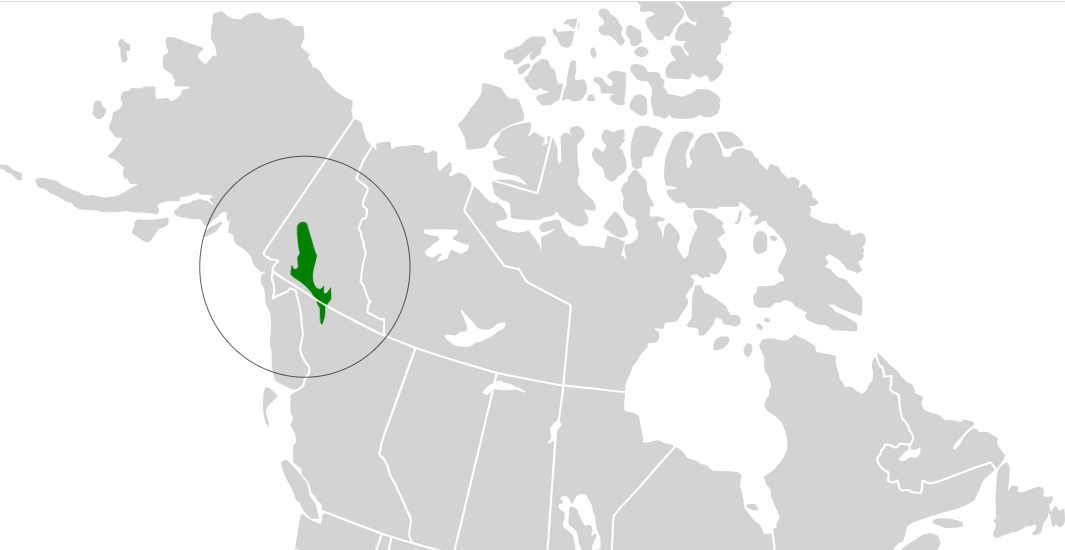

In [183]:
from IPython.display import Image
Image(filename='forest.png') 

Terrestrial ecoregions of North America : a conservation assessment. Taylor H Ricketts; et al. Washington, D.C. : Island Press, ©1999. xxiv, 485 p. : ill. (some col.), maps (some col.) ; 28 cm. (ISBN 9781559637220)

# Import libraries

In [278]:
import io, requests

import numpy as np
import pandas as pd
import geopandas as gpd

import rasterio as rst

import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
sns.set()

%matplotlib inline

# Get datasets

In [2]:
def getdf(link):
  req = requests.get(link).content
  return gpd.read_file(io.StringIO(req.decode('utf-8')))

# Administrative Boundaries

#### Get data for Yukon

In [106]:
ykn = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/CAN/CAN_AL4_Yukon.json'
ykn_df = getdf(ykn)

In [109]:
ykn_df

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,geometry
0,CAN,CA-YT,Yukon,0,0,0,administrative,4,"MULTIPOLYGON (((223.46221 68.90243, 223.46143 ..."


#### Visualizing the Yukon province

<AxesSubplot:>

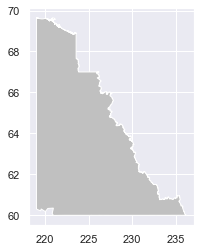

In [171]:
ykn_df.plot(color='silver')

#### Get data for British Columbia

In [131]:
bricol = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/CAN/CAN_AL4_British Columbia_GEZ.json'
bricol_df = getdf(bricol)

In [132]:
bricol_df

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,CAN,CA-BC,British Columbia,Boreal coniferous forest,41,Ba,4,"POLYGON ((239.99864 54.53148, 239.99864 54.545..."
1,CAN,CA-BC,British Columbia,Boreal mountain system,43,BM,4,"MULTIPOLYGON (((229.51665 54.82880, 229.51665 ..."
...,...,...,...,...,...,...,...,...
4,CAN,CA-BC,British Columbia,Temperate mountain system,35,TeM,4,"MULTIPOLYGON (((235.10794 48.67623, 235.10789 ..."
5,CAN,CA-BC,British Columbia,Temperate oceanic forest,31,TeDo,4,"MULTIPOLYGON (((236.34204 48.31735, 236.34213 ..."


#### Visualizing the British Columbia province

<AxesSubplot:>

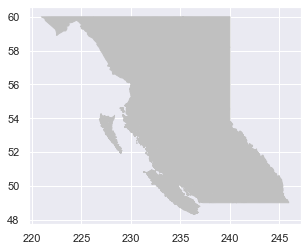

In [172]:
bricol_df.plot(color='silver',edgecolor='silver')

#### Concatenate the boundaries for the 2 provinces

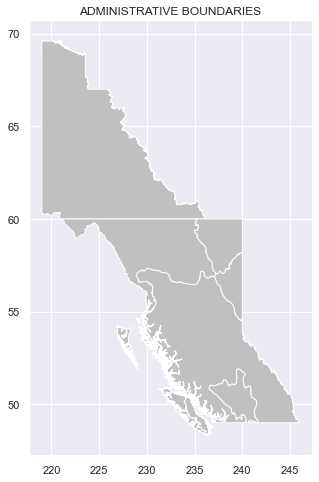

In [189]:
boundaries_df=pd.concat([ykn_df, bricol_df], axis=0)

fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.set_title('ADMINISTRATIVE BOUNDARIES')
boundaries_df.plot(ax=ax,color='silver',edgecolor='white')
plt.show()

# The forests

#### Terrestrial Ecoregions data

In [38]:
terr_ecoregions = "https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/TerrestrialEcoregionsoftheWorld_WWF.geojson"
terr_ecoregions_df = getdf(terr_ecoregions)

In [42]:
terr_ecoregions_df.shape

(14351, 22)

In [44]:
pd.options.display.max_columns = None
terr_ecoregions_df.head()

,OBJECTID_1,OBJECTID,AREA,ECO_NAME,REALM,BIOME,ECO_NUM,ECO_ID,ECO_SYM,GBL_STAT,G200_REGIO,G200_NUM,G200_BIOME,G200_STAT,area_km2,eco_code,BIOME_1,GBL_STAT_1,REALM_1,Shape_Length,Shape_Area,geometry
0,1,1,29.802942,Northern Mesoamerican Pacific mangroves,NT,14,4,61404,119,1,,0,0,0,8174,NT1404,,,Neotropics,0.219475,0.002769,"POLYGON ((-112.30433 29.33480, -112.29035 29.3..."
1,2,2,11.977824,Northern Mesoamerican Pacific mangroves,NT,14,4,61404,119,1,,0,0,0,8174,NT1404,,,Neotropics,0.193289,0.001111,"POLYGON ((-112.19639 29.20719, -112.19669 29.2..."
2,3,3,77301.372760,Sinaloan dry forests,NT,2,28,60228,98,1,Southern Mexican Dry Forests,56,2,1,77362,NT0228,,,Neotropics,111.951414,6.879188,"POLYGON ((-108.40314 28.29783, -108.41069 28.3..."
3,4,4,215.489182,Northern Mesoamerican Pacific mangroves,NT,14,4,61404,119,1,,0,0,0,8174,NT1404,,,Neotropics,1.273654,0.019701,"POLYGON ((-110.58808 27.85878, -110.59068 27.8..."
4,5,5,19.639089,Northern Mesoamerican Pacific mangroves,NT,14,4,61404,119,1,,0,0,0,8174,NT1404,,,Neotropics,0.363068,0.001791,"POLYGON ((-110.53048 27.31542, -110.55385 27.3..."


#### Forests' statistics

In [105]:
ykn_int = terr_ecoregions_df[terr_ecoregions_df['ECO_NAME']=='Yukon Interior dry forests']
ykn_int

,OBJECTID_1,OBJECTID,AREA,ECO_NAME,REALM,BIOME,ECO_NUM,ECO_ID,ECO_SYM,GBL_STAT,G200_REGIO,G200_NUM,G200_BIOME,G200_STAT,area_km2,eco_code,BIOME_1,GBL_STAT_1,REALM_1,Shape_Length,Shape_Area,geometry
5950,5951,5252,62742.225977,Yukon Interior dry forests,NA,6,17,50617,65,2,,0,0,0,62742,NA0617,,,Nearctic,39.383198,10.516696,"POLYGON ((-135.07761 62.66053, -135.18541 62.7..."


<AxesSubplot:>

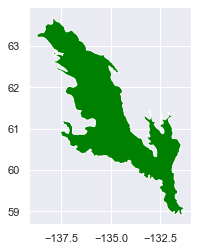

In [176]:
ykn_int.plot(color='green')

# Climate

In [231]:
climate='https://datasets.mojaglobal.workers.dev/0:/Climate/IPCC_ClimateZoneMap_Vector.geojson'
climate_df=getdf(climate)

In [232]:
climate_df.shape

(26165, 2)

In [233]:
climate_df.head()

,CLASS_NAME,geometry
0,0,"MULTIPOLYGON (((-37.65000 83.50000, -37.65000 ..."
1,0,"MULTIPOLYGON (((-38.75000 83.40000, -38.75000 ..."
2,0,"MULTIPOLYGON (((-38.60000 83.40000, -38.60000 ..."
3,0,"MULTIPOLYGON (((-37.15000 83.40000, -37.15000 ..."
4,5,"MULTIPOLYGON (((-40.40000 83.40000, -40.40000 ..."


In [234]:
#remove all CLASS_NAME=0
climate_df=climate_df[climate_df['CLASS_NAME']!=0]

In [235]:
climate_df.shape

(23828, 2)

In [236]:
#filter data for the forest
ykn_int_climate_df = climate_df.clip(ykn_int)

In [237]:
ykn_int_climate_df.shape

(77, 2)

In [238]:
ykn_int_climate_df.head()

,CLASS_NAME,geometry
5286,8,"MULTIPOLYGON (((-137.95000 63.50000, -137.9000..."
3994,7,"POLYGON ((-137.35000 63.25000, -137.35000 63.1..."
3972,7,"POLYGON ((-137.75000 63.35000, -137.75000 63.2..."
3938,7,"POLYGON ((-138.00000 63.40000, -138.00000 63.3..."
5504,7,"MULTIPOLYGON (((-137.50000 60.90000, -137.5000..."


In [239]:
classification={'1':'Tropical montane','2':'Tropical wet', 
                '3':'Tropical moist','4':'Tropical dry', 
                '5':'Warm temperate moist','6':'Warm temperate dry',
                '7':'Cool temperate moist','8':'Cool temperate dry',
                '9':'Boreal moist','10':'Boreal dry','11':'Polar moist',
                '12':'Polar dry'}

ykn_int_climate_df['CLASS_NAME']=climate_df['CLASS_NAME'].astype('str').replace(classification)

In [240]:
ykn_int_climate_df.head()

,CLASS_NAME,geometry
5286,Cool temperate dry,"MULTIPOLYGON (((-137.95000 63.50000, -137.9000..."
3994,Cool temperate moist,"POLYGON ((-137.35000 63.25000, -137.35000 63.1..."
3972,Cool temperate moist,"POLYGON ((-137.75000 63.35000, -137.75000 63.2..."
3938,Cool temperate moist,"POLYGON ((-138.00000 63.40000, -138.00000 63.3..."
5504,Cool temperate moist,"MULTIPOLYGON (((-137.50000 60.90000, -137.5000..."


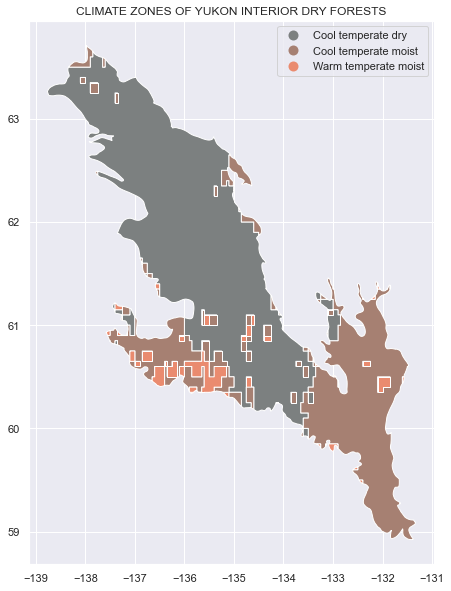

In [301]:
cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",["#7C8080","#A68072","#EA8B6F"])
fig,ax = plt.subplots(1,1,figsize=(15,10))
ax.set_title('CLIMATE ZONES OF YUKON INTERIOR DRY FORESTS')
ykn_int_climate_df.plot(ax=ax,column='CLASS_NAME',cmap=cmap,figsize=(15,10),legend=True)
plt.show()